In [2]:
%qtconsole --style monokai
%matplotlib inline

from PIL import Image, ImageFilter
import numpy as np
import matplotlib.pyplot as plt

import cv2

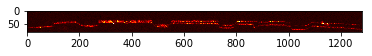

In [3]:
im0 = cv2.imread('../data/20170126/H12.4_D15.5_Off.bmp', 0).astype('float')
im1 = cv2.imread('../data/20170126/H12.4_D15.5_On.bmp', 0).astype('float')
line_img = im1-im0

w = 40 # width to cover the laser line on image
line_img = line_img[:-1, :]
line_center = np.argmax(line_img.mean(axis=1))
line_img = line_img[line_center - w: line_center + w, :]
line_img -= line_img.min()
line_img = line_img.astype(np.uint8)
plt.imshow(line_img, cmap='hot')

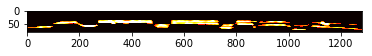

In [5]:
import cv2
import numpy as np
import scipy.signal as signal
line_img = cv2.GaussianBlur(line_img, ksize=(0, 0), sigmaX=3, sigmaY=1.5)
line_img[line_img <20] = 0
plt.figure(); plt.imshow(line_img, vmax=50, cmap='hot')

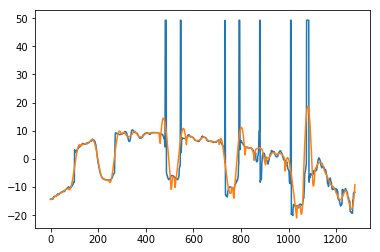

In [12]:
#  setup a slider window to find the center of the line at each column
h, w = line_img.shape
profile = np.zeros(w)
d_n = np.arange(h)
for i in range(w):
   col = line_img[:, i]
   if sum(d_n * col) < 100:
       pass
   else:
       profile[i] = sum(d_n * col) / col.sum()

profile = profile.mean() - profile 
plt.plot(profile)
profile2 = signal.savgol_filter(profile, 51, 3)
plt.plot(profile2)
